<a href="https://colab.research.google.com/github/Sau1o/APIGitHub/blob/main/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link para coolab:
https://colab.research.google.com/drive/1ObJ5hQWsnBLOVEtWLea90z1YpjyTS3Pg?usp=sharing

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ponte.png to ponte.png


#Thresholding

Pode ser traduzido por limiarização e no caso de processamento de
imagens na maior parte das vezes utilizamos para binarização da imagem. Convertemos imagens de cinza para preto (valor do pixel 0) ou branco (valor do pixel 255)

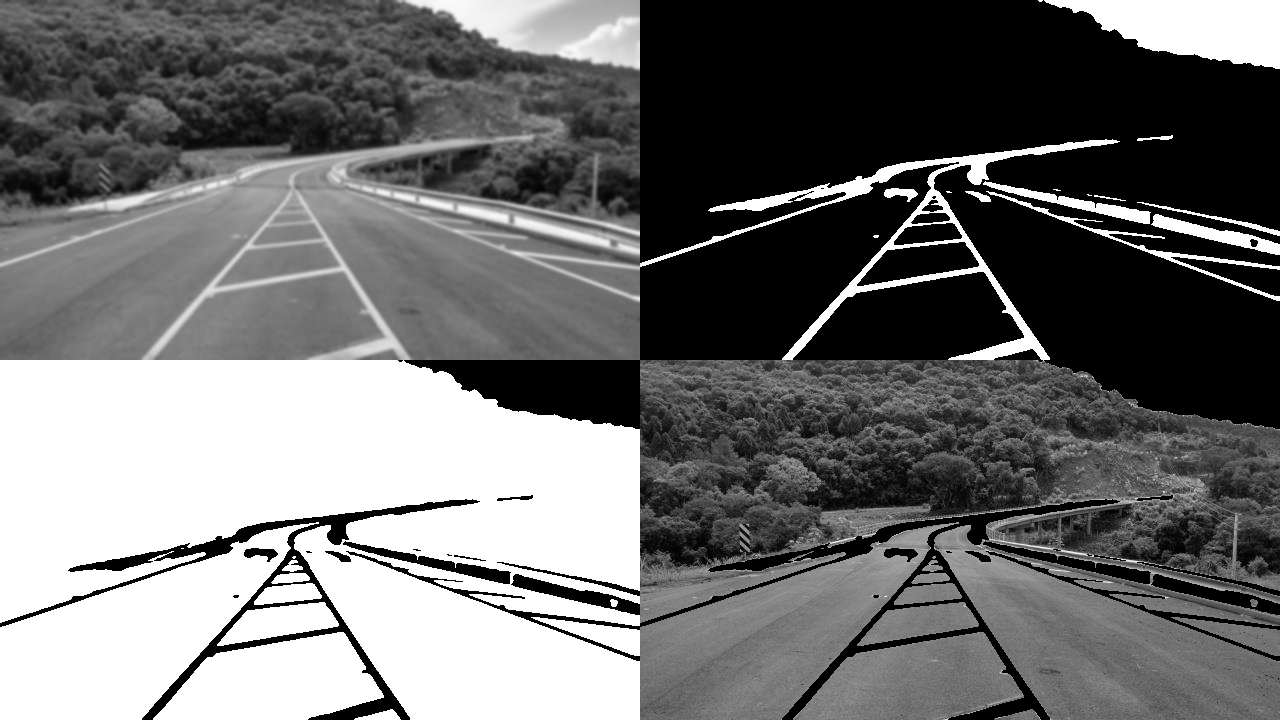

In [3]:
img = cv2.imread('/content/ponte.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV)
resultado = np.vstack([ np.hstack([suave, bin]),
np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])])
cv2_imshow(resultado)

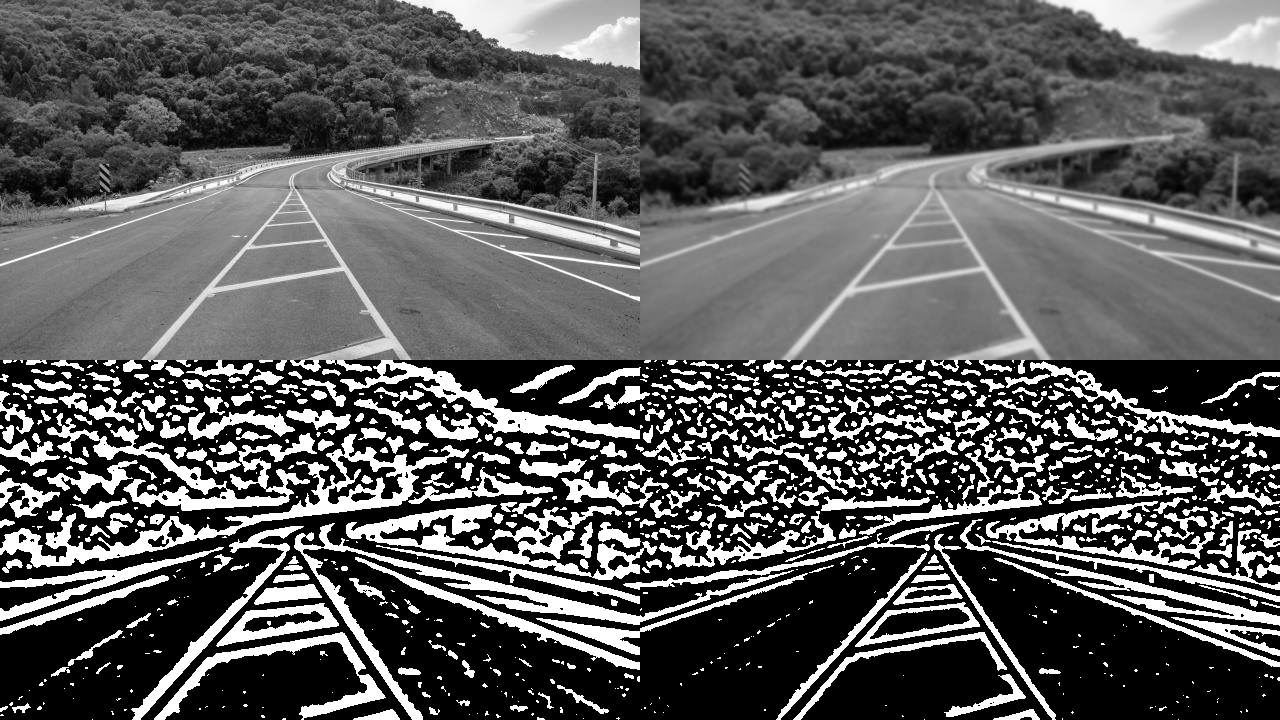

In [4]:
#Threshold adaptativo
img = cv2.imread('/content/ponte.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur

bin1 = cv2.adaptiveThreshold(suave, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
bin2 = cv2.adaptiveThreshold(suave, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)

resultado = np.vstack([ np.hstack([img, suave]), np.hstack([bin1, bin2])])

cv2_imshow(resultado)